In [1]:
%reset -f

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns
pd.set_option("display.max_rows",None) #show all columns

In [2]:
df1=pd.read_csv('dataset/wheat-farm.csv')


In [3]:

df2=df1.copy()
#display(df2)
df2=df1[['Province','Province_number','LongitudeDegree','LatitudeDegree','ECwatirrig_dsm'
         ,'SoilTexture1Light2Normal3Heavy','effective_rain_fao_currentyear_mm','leeching_need_percent'
         ,'water_vol_m3ha','GrowthLength150200_123','number_of_irrig','yield_kgha']].copy()
display(df2)


,Province,Province_number,LongitudeDegree,LatitudeDegree,ECwatirrig_dsm,SoilTexture1Light2Normal3Heavy,effective_rain_fao_currentyear_mm,leeching_need_percent,water_vol_m3ha,GrowthLength150200_123,number_of_irrig,yield_kgha
0,Ardebil,1,47.880000,39.540000,1.1,3,46,3,4059,3,16,4743
1,Ardebil,1,47.880000,39.540000,1.1,3,50,3,3803,3,17,4934
2,Ardebil,1,47.700000,39.530000,1.1,3,117,3,5085,3,4,5546
3,Ardebil,1,47.780000,39.610000,1.2,3,89,3,7905,3,5,6000
4,Ardebil,1,47.970000,39.560000,1.1,3,65,3,8867,2,6,6000
5,Ardebil,1,47.960000,39.600000,1.0,3,65,3,6920,3,4,7200
6,Khuzestan,2,49.981050,30.423470,3.9,3,110,12,2884,1,12,2000
7,Khuzestan,2,50.193710,30.704770,1.7,3,190,5,4160,2,4,2925
8,Khuzestan,2,50.117040,30.666090,2.6,3,110,8,4363,1,5,2941
9,Khuzestan,2,50.171370,30.684550,1.7,3,119,5,4030,2,5,2983


In [4]:

x_province=df2['Province_number'].to_numpy()
x_ecwat = df2['ECwatirrig_dsm'].to_numpy()
x_soil = df2['SoilTexture1Light2Normal3Heavy'].to_numpy()
x_rain = df2['effective_rain_fao_currentyear_mm'].to_numpy()
x_wat = df2['water_vol_m3ha'].to_numpy()
x_gd = df2['GrowthLength150200_123'].to_numpy()
x_ie = df2['number_of_irrig'].to_numpy()
x_leech=df2['leeching_need_percent'].to_numpy()
x_long=df2['LongitudeDegree'].to_numpy()
x_lat=df2['LatitudeDegree'].to_numpy()
y = df2['yield_kgha'].to_numpy()



#N=len(y)
x=np.c_[x_province,x_ecwat,x_soil,x_rain,x_wat,x_gd,x_ie,x_leech,x_long,x_lat]
province=df2['Province'].astype(str).values.tolist()

In [5]:
#province_unique= list(set(province))
#for i in range(8):
    #print(province_unique[i],province.count(province_unique[i]))

In [6]:
NProv=12
province_unique= [None] *NProv

for i in range(1,NProv+1):
    province_unique[i-1]=province[np.where(x_province==i)[0][0]]

In [7]:
for i in range(NProv):
    print(i+1,province_unique[i],np.count_nonzero(x_province==i+1))

1 Ardebil 6
2 Khuzestan 55
3 KhorasanRazavi 43
4 Fars 48
5 Kerman 11
6 Kermanshah 8
7 Hamedan 10
8 EastAzarbayjan 14
9 WestAzarbayjan 9
10 Semnan 12
11 Qazvin 12
12 Golestan 13


In [8]:
#c1*1+c2*1+c3*1+c4*1+c5*1+c6*1
#sum(c1*1),sum(c2*1),sum(c3*1),sum(c4*1),sum(c5*1),sum(c6*1)

y1=6000*(a[ 1]+a[ 2]*x_wat/10000+a[ 3]*x_rain/400+a[ 4]*x_soil/10+a[ 5]*x_ecwat/1.5+a[ 6]*x_gd/3+a[ 7]*x_ie/10+a[ 8]*x_leech/10)
ardebil, east west azerbayjan        ,y1 [ 0.003  1.01   0.501 -0.193 -0.03   0.144  0.173 -0.044]
qazvin, hamedan, kermanshah, golestan,y2 [ 0.139 -0.022  0.351  0.065 -0.197  0.993 -0.443  0.479]
semnan, kerman                       ,y3 [ 1.208 -0.13  -0.955  0.924  0.372  0.174 -0.291 -0.926]
KhorasanR                            ,y4 [-0.63   1.158  0.171  1.978  0.482  0.211  0.115 -0.943]
Khozestan                            ,y5 [ 0.909  0.21   0.331 -1.293  0.441  0.068 -0.113 -1.123]
fars                                 ,y6 [ 0.484  0.378 -0.107 -0.145  0.103  0.493  0.058 -0.31 ]


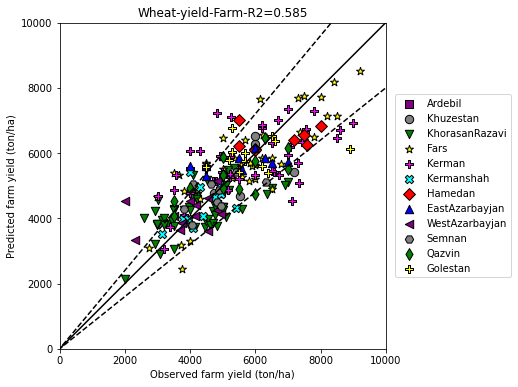

In [9]:



a = [1.358, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def func1(a,x):
    
    x_province=x[:,0]
    x_ecwat = x[:,1]
    x_soil = x[:,2]
    x_rain =x[:,3]
    x_wat = x[:,4]
    x_gd = x[:,5]
    x_ie = x[:,6]
    x_leech=x[:,7]
    x_long=x[:,8]
    x_lat=x[:,9]
    
    
    c1=np.logical_or.reduce((x_province==8,x_province==9,x_province==1))  #ardebil, east west azerbayjan
    c2=np.logical_or.reduce((x_province==11,x_province==6,x_province==7,x_province==12)) #qazvin, hamedan, kermanshah, golestan
    c3=np.logical_or(x_province==5,x_province==10) #semnan, kerman
    c4=x_province==3  #KhorasanR 
    c5=x_province==2 #Khozestan 
    c6=x_province==4 #fars 
    
    y1=6000*(a[ 1]+a[ 2]*x_wat/10000+a[ 3]*x_rain/400+a[ 4]*x_soil/10+a[ 5]*x_ecwat/1.5+a[ 6]*x_gd/3+a[ 7]*x_ie/10+a[ 8]*x_leech/10)
    y2=6000*(a[ 9]+a[10]*x_wat/10000+a[11]*x_rain/400+a[12]*x_soil/10+a[13]*x_ecwat/1.5+a[14]*x_gd/3+a[15]*x_ie/10+a[16]*x_leech/10)
    y3=6000*(a[17]+a[18]*x_wat/10000+a[19]*x_rain/400+a[20]*x_soil/10+a[21]*x_ecwat/1.5+a[22]*x_gd/3+a[23]*x_ie/10+a[24]*x_leech/10)
    y4=6000*(a[25]+a[26]*x_wat/10000+a[27]*x_rain/400+a[28]*x_soil/10+a[29]*x_ecwat/1.5+a[30]*x_gd/3+a[31]*x_ie/10+a[32]*x_leech/10)
    y5=6000*(a[33]+a[34]*x_wat/10000+a[35]*x_rain/400+a[36]*x_soil/10+a[37]*x_ecwat/1.5+a[38]*x_gd/3+a[39]*x_ie/10+a[40]*x_leech/10)
    y6=6000*(a[41]+a[42]*x_wat/10000+a[43]*x_rain/400+a[44]*x_soil/10+a[45]*x_ecwat/1.5+a[46]*x_gd/3+a[47]*x_ie/10+a[48]*x_leech/10)
    

    

    
    y=y1
    y[c1]=y1[c1]
    y[c2]=y2[c2]
    y[c3]=y3[c3]
    y[c4]=y4[c4]
    y[c5]=y5[c5]
    y[c6]=y6[c6]


    return y




func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2


res = minimize(func2,a)
a=np.round(res.x,3)

print("y1=6000*(a[ 1]+a[ 2]*x_wat/10000+a[ 3]*x_rain/400+a[ 4]*x_soil/10+a[ 5]*x_ecwat/1.5+a[ 6]*x_gd/3+a[ 7]*x_ie/10+a[ 8]*x_leech/10)")
print("ardebil, east west azerbayjan        ,y1",a[1:8+1])
print("qazvin, hamedan, kermanshah, golestan,y2",a[9:16+1])
print("semnan, kerman                       ,y3",a[17:24+1])
print("KhorasanR                            ,y4",a[25:32+1])
print("Khozestan                            ,y5",a[33:40+1])
print("fars                                 ,y6",a[41:48+1])

#y1=32000*(-0.067+0.213*x_wat/11000+0.796*x_y1/20000)

yhat=func1(a,x)


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']
colors_=['purple','gray','green','yellow','magenta','cyan','red'
         ,'blue','purple','gray','green','yellow','magenta','cyan','red','blue',]

for i in range(NProv):
    cond=x_province==i
    m=ax.scatter(y[cond], yhat[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])

#ax.scatter(y,y_hat_lin1)
ax.legend(loc='right',ncol=1,bbox_to_anchor=(1.4, 0.5))

ax.plot(np.array([0,100000]),np.array([0,100000]), 'k-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'k--')
ax.set_xlabel('Observed farm yield (ton/ha)')
ax.set_ylabel('Predicted farm yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
R2=np.round(r2_score(y,yhat),3)

ax.set_title("Wheat-yield-Farm-R2="+str(R2))
fig.savefig('fig/wheat_farm_yield.png', dpi=300)




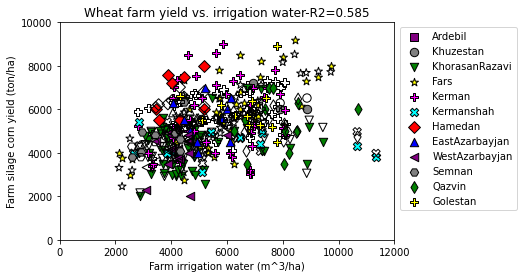

In [10]:
for i in range(NProv):
    cond=x_province==i
    plt.scatter(x_wat[cond], y[cond],marker=markers_[i],label=province_unique[i],s=70,edgecolor='k',facecolor=colors_[i])
    plt.scatter(x_wat[cond], yhat[cond],marker=markers_[i],s=70,facecolor='none',edgecolor='k')
    
    
plt.xlabel('Farm irrigation water (m^3/ha)')
plt.ylabel('Farm silage corn yield (ton/ha)')
plt.legend(bbox_to_anchor=(1.38, 1), loc='upper right', ncol=1)
plt.xlim(left=0,right=12000)
plt.ylim(bottom=0,top=10000)

plt.title("Wheat farm yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig/wheat_farm_yield_vs_irrigwat.png', dpi=300)